In [2]:
import mglearn
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import plot_tree
import os
from sklearn.tree import DecisionTreeRegressor

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)


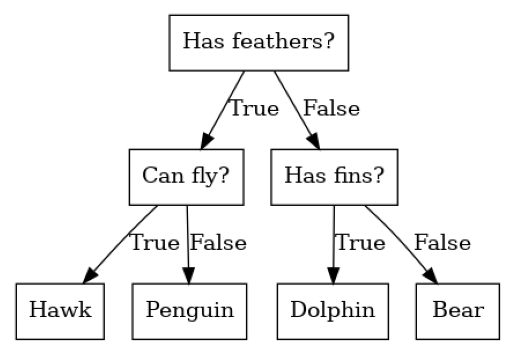

In [4]:
mglearn.plots.plot_animal_tree()

In [5]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Training Set Point: {:.3f}".format(tree.score(X_train, y_train)))
print("Test Set Point: {:.3f}".format(tree.score(X_test, y_test)))

Training Set Point: 1.000
Test Set Point: 0.937


In [6]:
tree = tree = DecisionTreeClassifier(max_depth = 4, random_state=0)
tree.fit(X_train, y_train)
print("Training Set Point: {:.3f}".format(tree.score(X_train, y_train)))
print("Test Set Point: {:.3f}".format(tree.score(X_test, y_test)))

Training Set Point: 0.988
Test Set Point: 0.951


In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

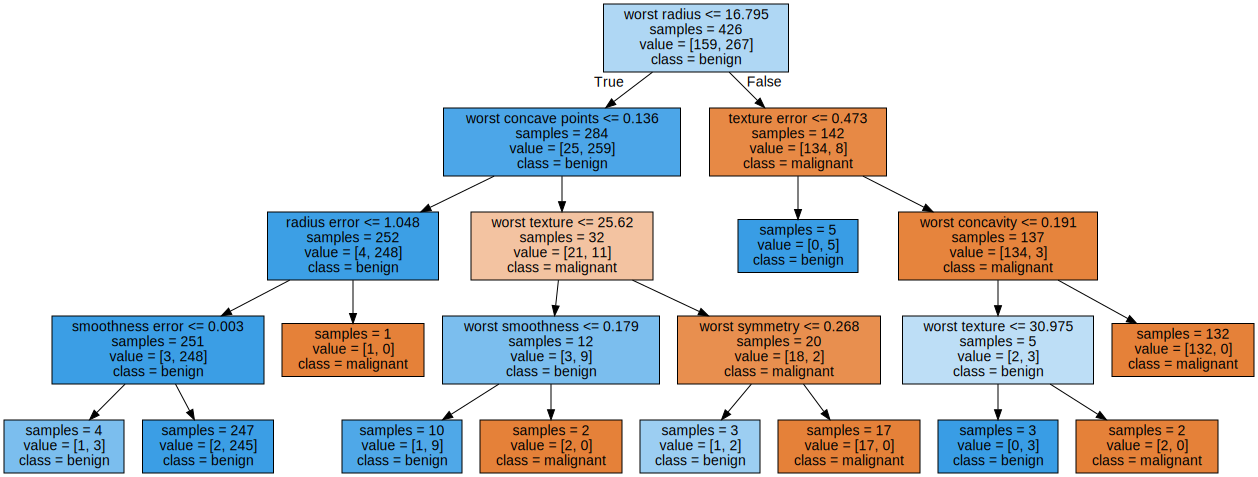

In [8]:
import graphviz

with open("tree.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

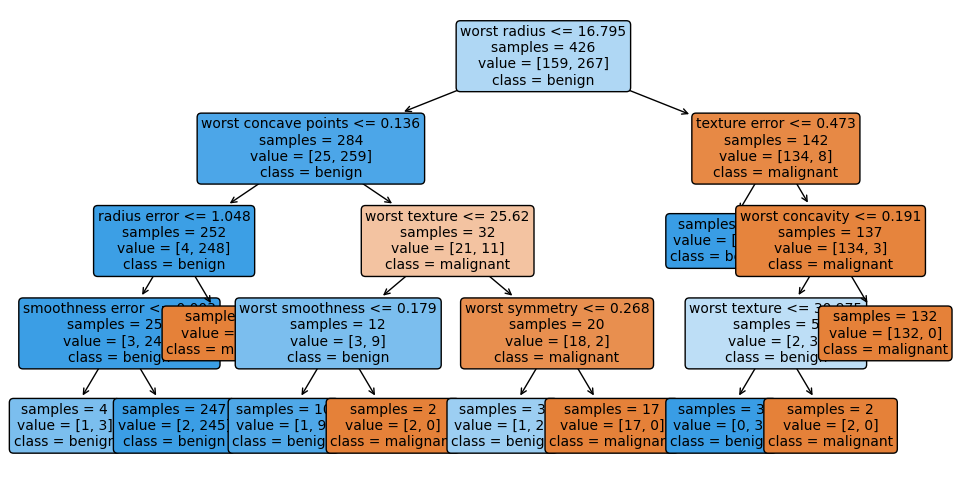

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(tree, class_names=["malignant", "benign"], feature_names=cancer.feature_names,
          impurity=False, filled = True, rounded=True, fontsize=10)
plt.show()

In [10]:
print("feature importance:\n", tree.feature_importances_)

feature importance:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


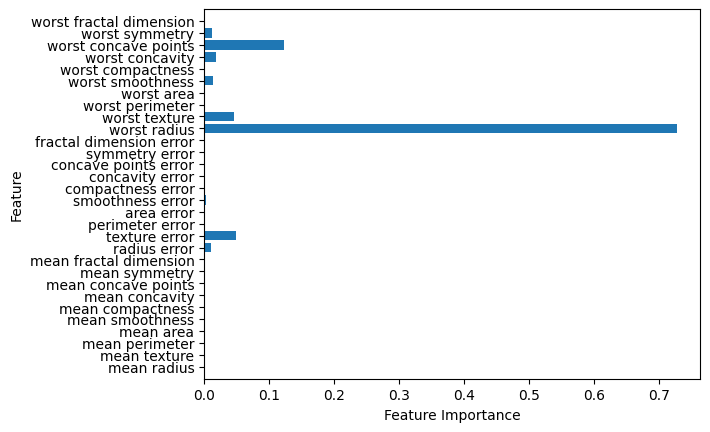

In [11]:
def plot_feature_importance_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importance_cancer(tree)

Feature importances: [0. 1.]


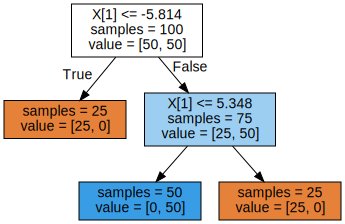

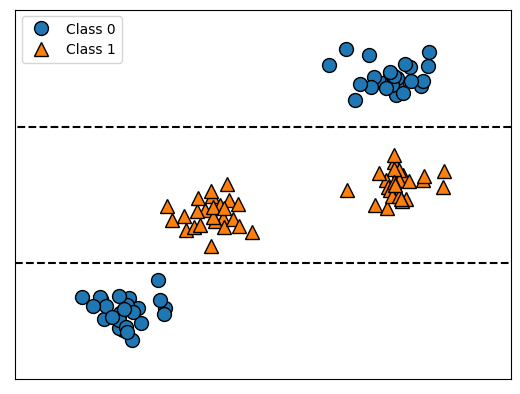

In [12]:
mglearn.plots.plot_tree_not_monotone()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


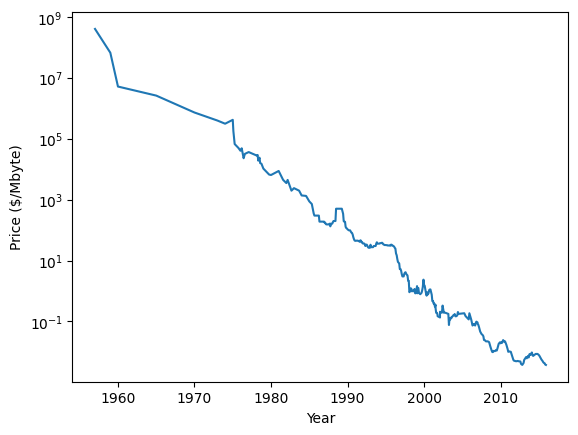

In [13]:
import os


ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price) 
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte)")
plt.show()


In [14]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date.values[:, np.newaxis]
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)


X_all = ram_prices.date.values[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

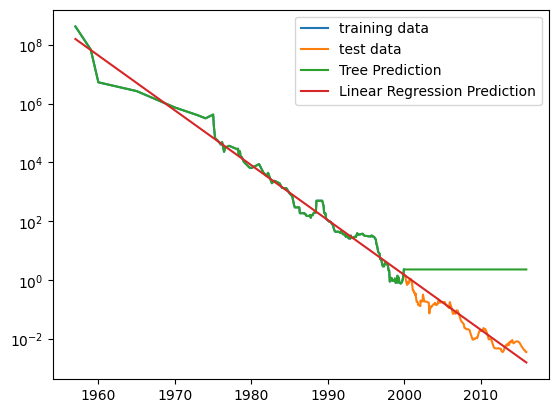

In [15]:
plt.semilogy(data_train.date, data_train.price, label="training data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree Prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear Regression Prediction")
plt.legend()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

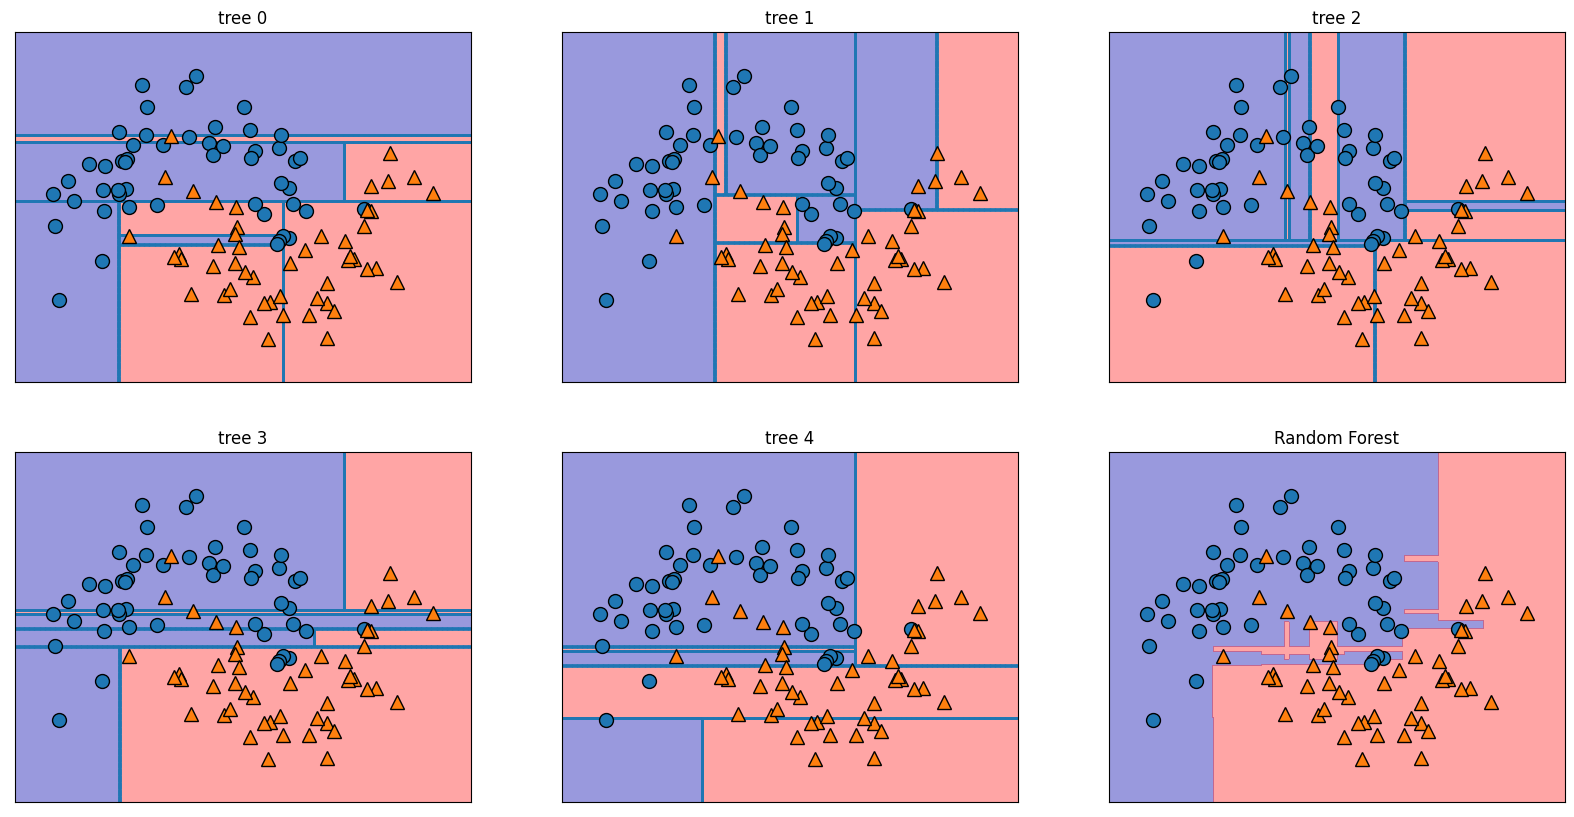

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [19]:
plot_feature_importances_cancer(forest)

NameError: name 'plot_feature_importances_cancer' is not defined

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test))) 



훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [21]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, n_estimators=500, learning_rate=0.05)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))


훈련 세트 정확도: 0.995
테스트 세트 정확도: 0.979


In [22]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test))) 

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


In [23]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score


gbrt = GradientBoostingClassifier(random_state=0, max_depth=1, n_estimators=200, learning_rate=0.1)


rf = RandomForestClassifier(random_state=0, n_estimators=200)


ensemble_clf = VotingClassifier(estimators=[('gbrt', gbrt), ('rf', rf)], voting='soft')


ensemble_clf.fit(X_train, y_train)
train_accuracy = ensemble_clf.score(X_train, y_train)
test_accuracy = ensemble_clf.score(X_test, y_test)

print("훈련 세트 정확도: {:.3f}".format(train_accuracy))
print("테스트 세트 정확도: {:.3f}".format(test_accuracy))


훈련 세트 정확도: 0.995
테스트 세트 정확도: 0.972


In [24]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

NameError: name 'plot_feature_importances_cancer' is not defined

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=0)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(solver='liblinear'), n_estimators=100,
                            oob_score=True, n_jobs=-1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

In [27]:
print("훈련 세트 정확도: {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도: 0.962
테스트 세트 정확도: 0.958
OOB 샘플의 정확도: 0.948


In [28]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5,
                            n_jobs=-1, random_state=42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

Text(0, 0.5, 'feature 1')

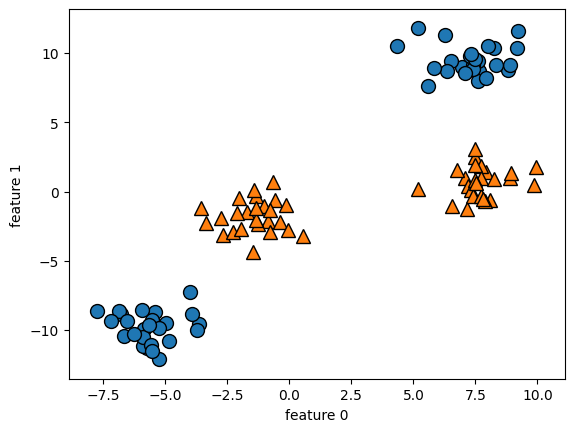

In [29]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

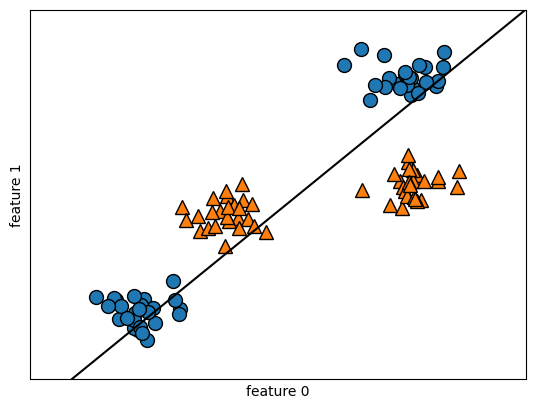

In [30]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=5000, tol=1e-3).fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

/tmp/ipykernel_23148/1297785363.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 ** 2')

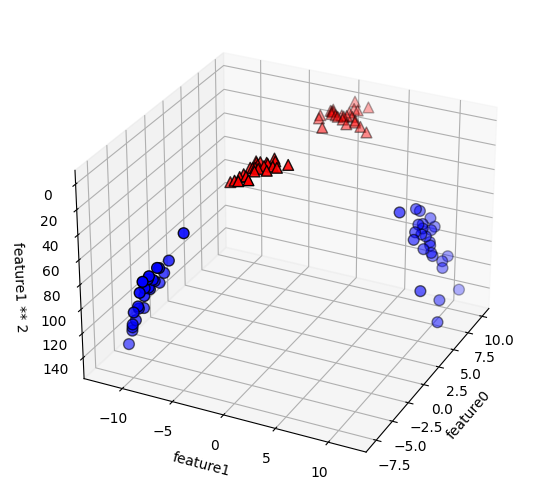

In [31]:

X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/home/ai/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/tmp/ipykernel_23148/3039681919.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 ** 2')

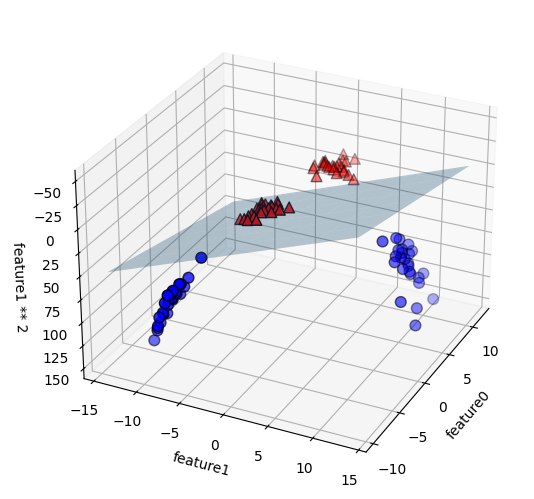

In [32]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_


figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'feature1')

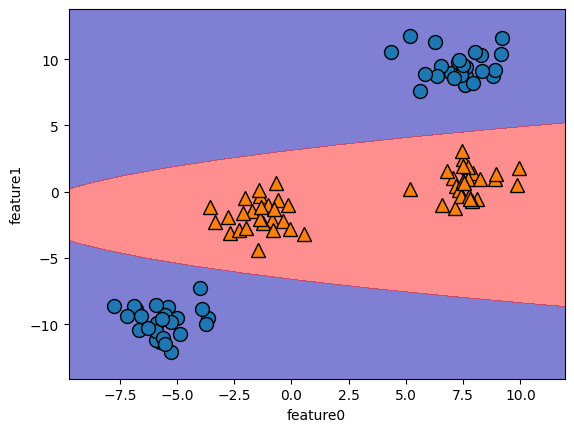

In [33]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("feature0")
plt.ylabel("feature1")


Text(0, 0.5, '특성 1')

/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


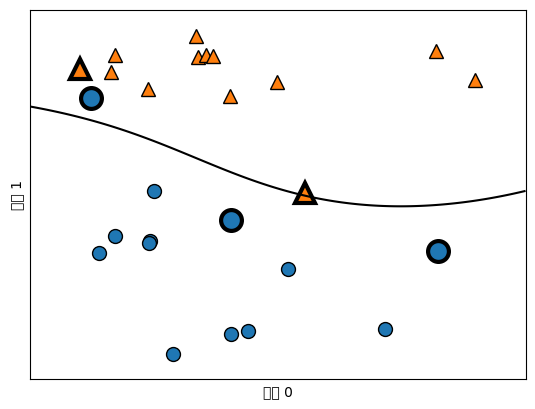

In [40]:

from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")


/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local

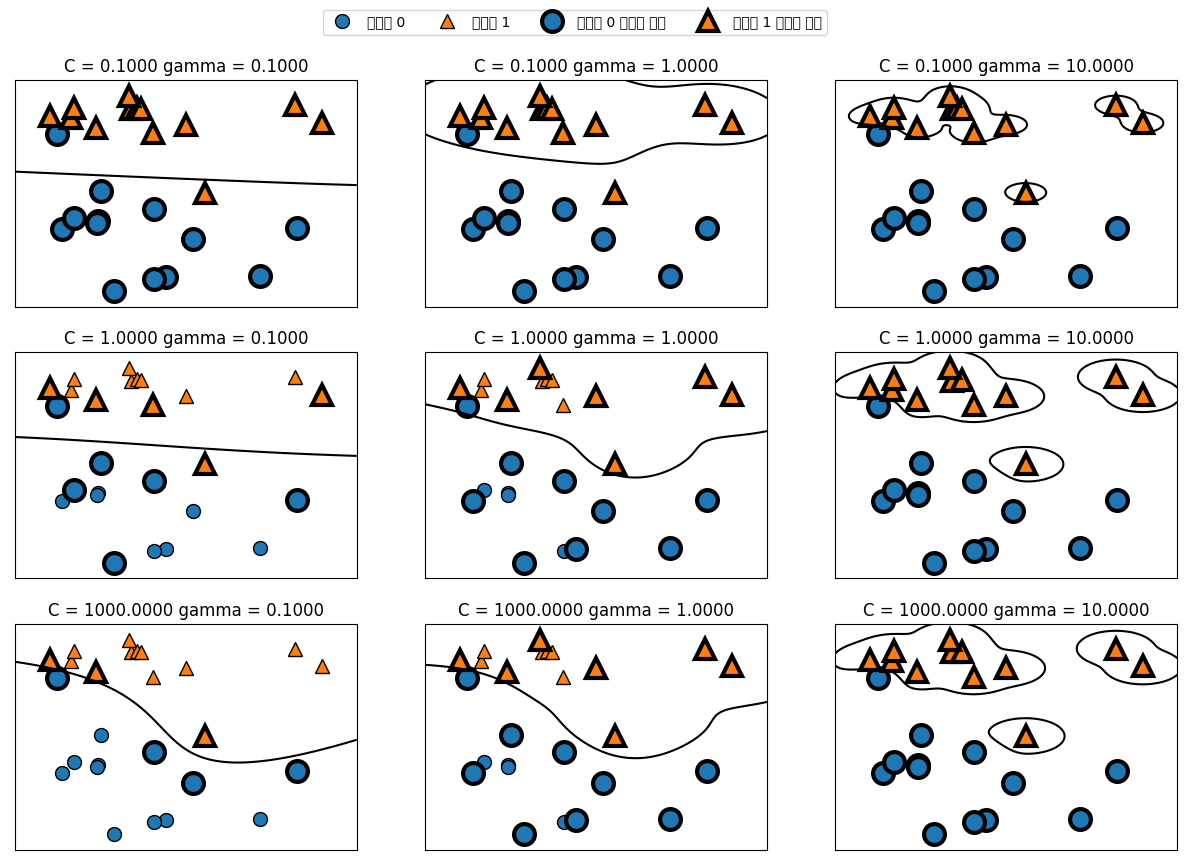

In [35]:

fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                  ncol=4, loc=(.9, 1.2))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(Xc_test, yc_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


Text(0, 0.5, '특성 크기')

/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.lo

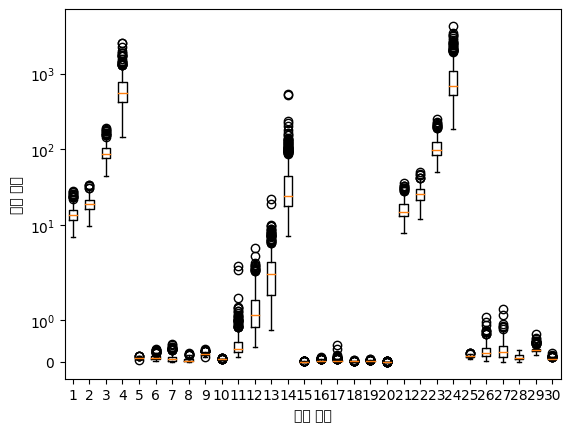

In [45]:
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")


In [41]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최소 값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최대 값\n {}".format(X_train_scaled.max(axis=0)))

특성별 최소 값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대 값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [42]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [43]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


In [44]:
svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.979


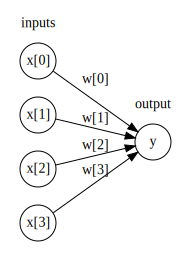

In [47]:
mglearn.plots.plot_logistic_regression_graph()

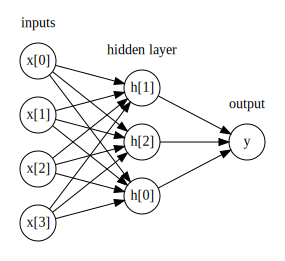

In [48]:
mglearn.plots.plot_single_hidden_layer_graph()

Text(0, 0.5, 'relu(x), tanh(x)')

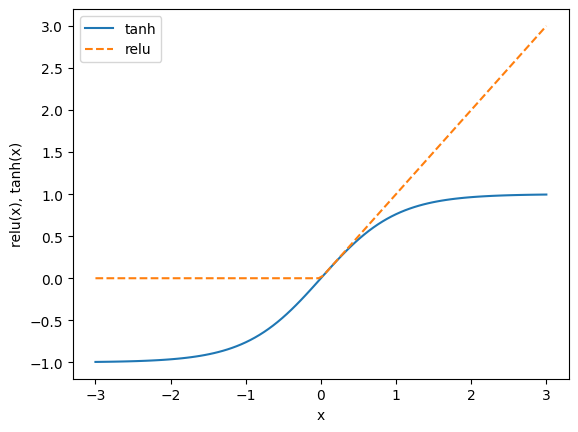

In [49]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

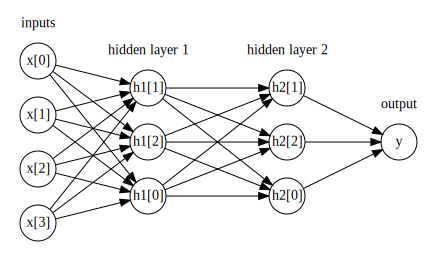

In [50]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'feature1')

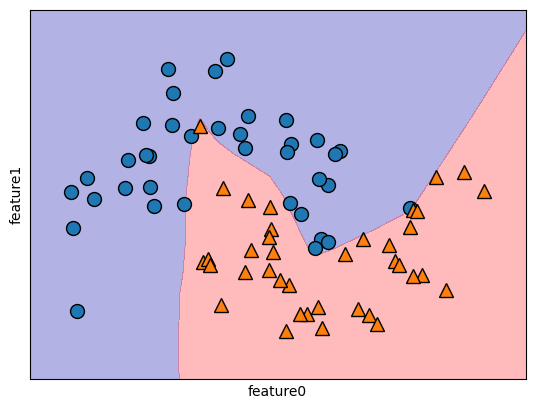

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature0")
plt.ylabel("feature1")

Text(0, 0.5, 'feature1')

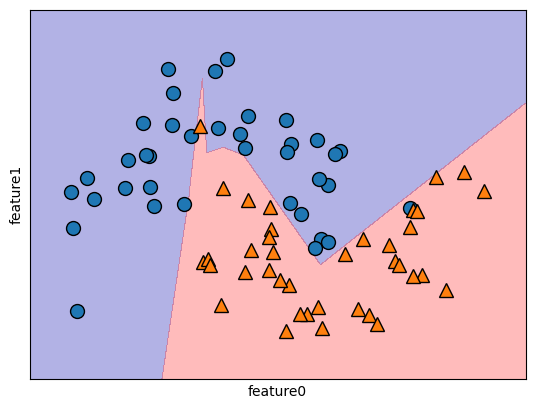

In [53]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], 
                   max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature0")
plt.ylabel("feature1")

Text(0, 0.5, 'feature1')

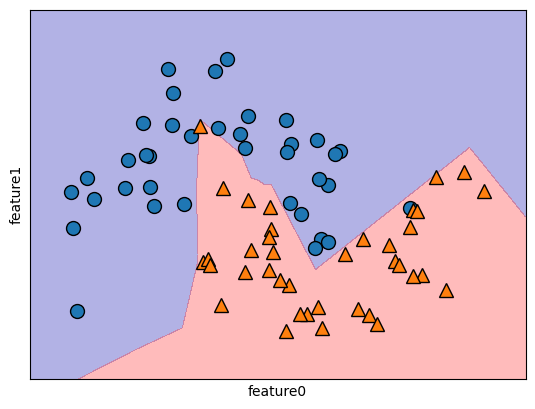

In [54]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10], 
                   max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature0")
plt.ylabel("feature1")

Text(0, 0.5, 'feature1')

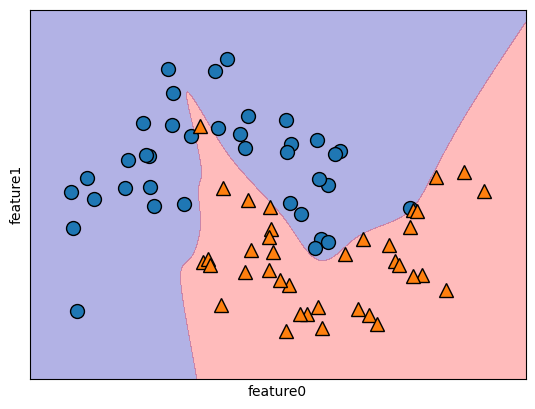

In [55]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',random_state=0, hidden_layer_sizes=[10,10], 
                   max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp,X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature0")
plt.ylabel("feature1")

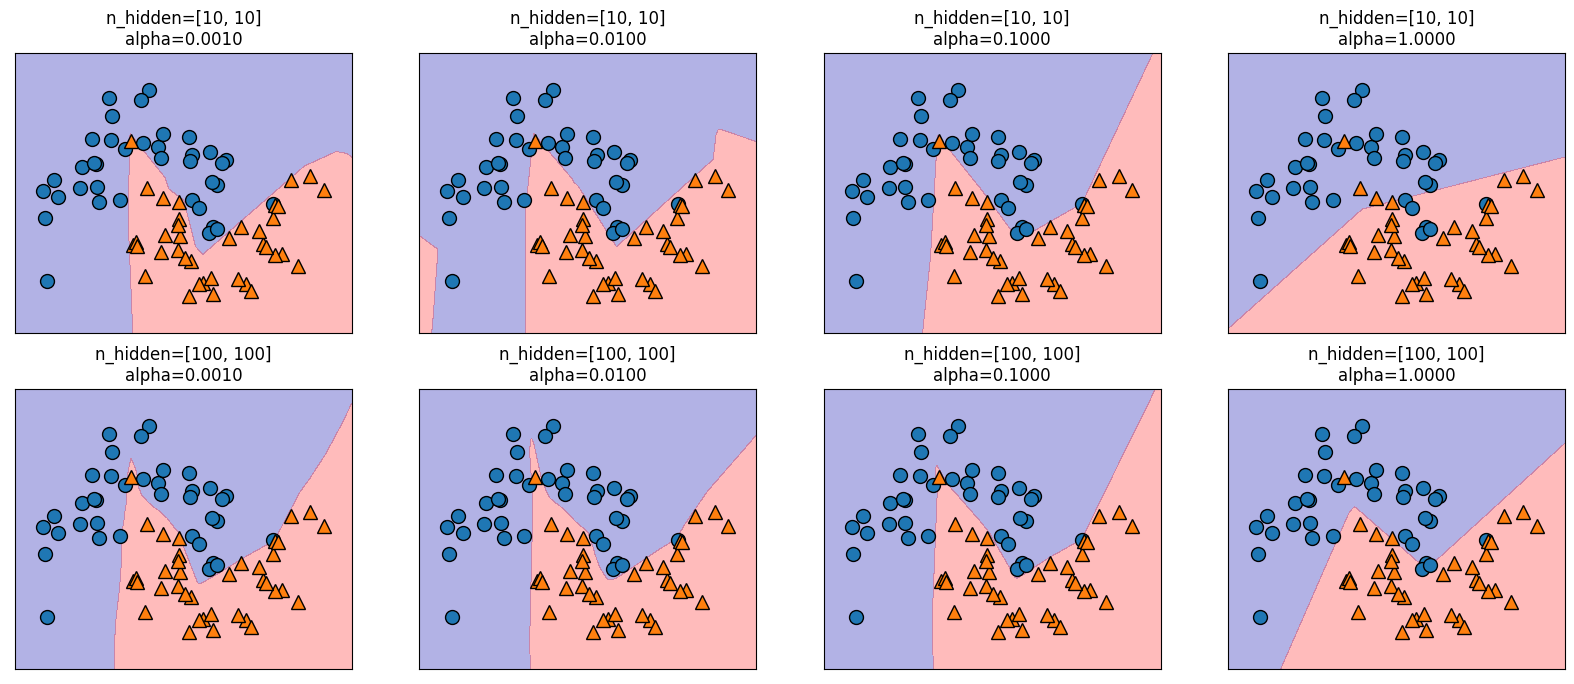

In [59]:
fig, axes = plt.subplots(2,4,figsize=(20,8))
for axx,n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx,[0.001,0.01,0.1,1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,  max_iter=1000,
                           hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                           alpha = alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                    n_hidden_nodes, n_hidden_nodes, alpha))

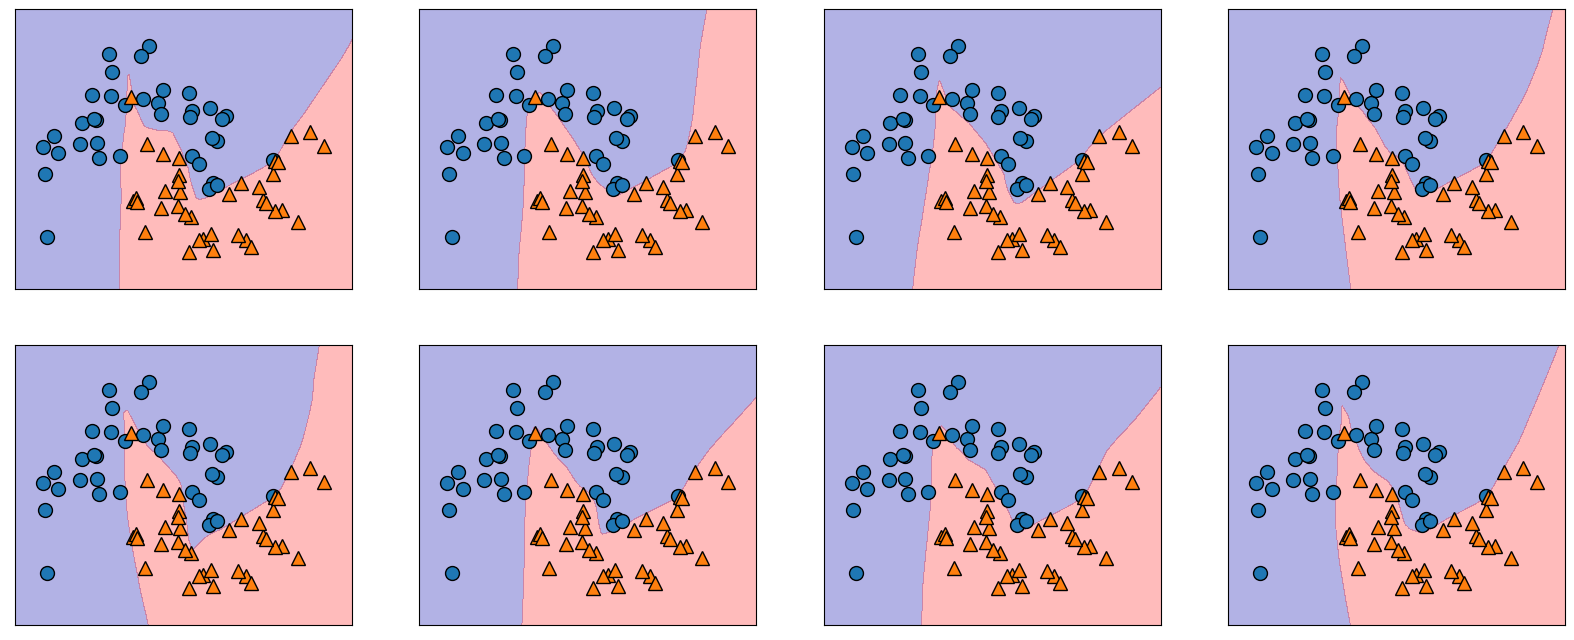

In [64]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,  
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)


In [65]:
#유방암 데이터의 특성별 최대값
print("Maximum values of features in breast cancer dataset:\n", cancer.data.max(axis=0))

Maximum values of features in breast cancer dataset:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [70]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [71]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


/home/ai/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [72]:
mlp = MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [73]:
mlp = MLPClassifier(max_iter=1000,alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45769 (\N{HANGUL SYLLABLE NIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45787 (\N{HANGUL SYLLABLE NIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ai/.local/l

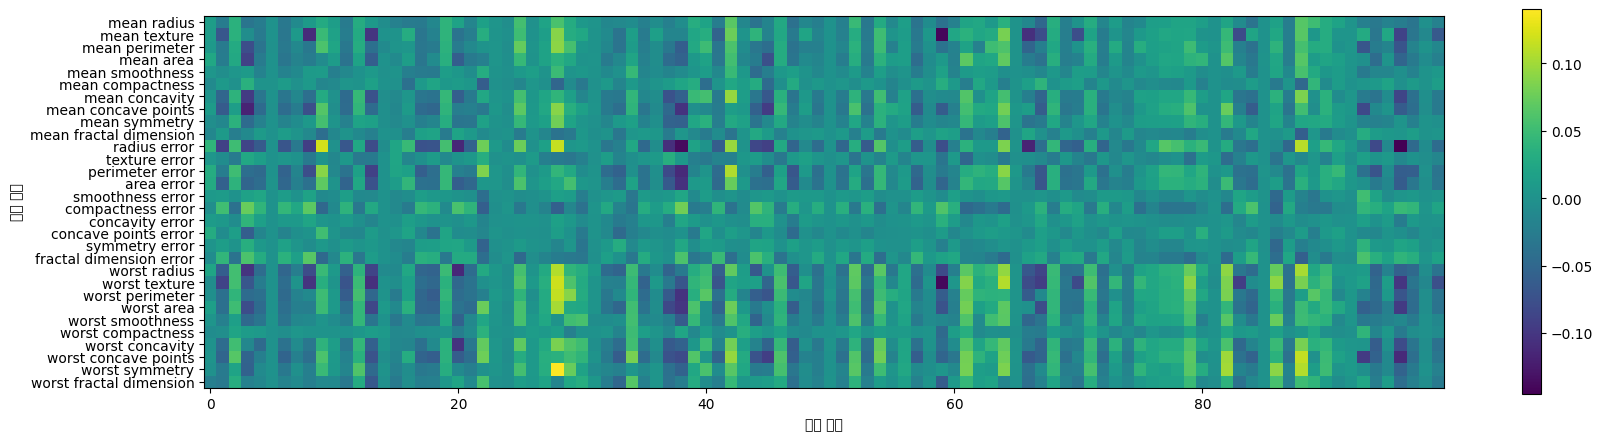

In [74]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()